# Regression Consulting Project

Congratulations! You've been contracted by Hyundai Heavy Industries to help them build a predictive model for some ships. [Hyundai Heavy Industries](http://www.hyundai.eu/en) is one of the world's largest ship manufacturing companies and builds cruise liners.

You've been flown to their headquarters in Ulsan, South Korea to help them give accurate estimates of how many crew members a ship will require.

They are currently building new ships for some customers and want you to create a model and use it to predict how many crew members the ships will need.

Here is what the data looks like so far:

    Description: Measurements of ship size, capacity, crew, and age for 158 cruise
    ships.


    Variables/Columns
    Ship Name     1-20
    Cruise Line   21-40
    Age (as of 2013)   46-48
    Tonnage (1000s of tons)   50-56
    passengers (100s)   58-64
    Length (100s of feet)  66-72
    Cabins  (100s)   74-80
    Passenger Density   82-88
    Crew  (100s)   90-96
    
It is saved in a csv file for you called "cruise_ship_info.csv". Your job is to create a regression model that will help predict how many crew members will be needed for future ships. The client also mentioned that they have found that particular cruise lines will differ in acceptable crew counts, so it is most likely an important feature to include in your analysis! 

Once you've created the model and tested it for a quick check on how well you can expect it to perform, make sure you take a look at why it performs so well!

In [205]:
#NOTE:- please answer all the question below using python(pandas,numpy) you are free to use any other liberaries if required please ignore all spark things you should answer all the questions in python only

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [206]:
df = pd.read_csv("cruise_ship_info.csv")

In [207]:
df

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00
...,...,...,...,...,...,...,...,...,...
153,Taurus,Star,22,3.341,0.66,2.79,0.33,50.62,0.59
154,Virgo,Star,14,76.800,19.60,8.79,9.67,39.18,12.00
155,Spirit,Windstar,25,5.350,1.58,4.40,0.74,33.86,0.88
156,Star,Windstar,27,5.350,1.67,4.40,0.74,32.04,0.88


In [208]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [209]:
df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship_name          158 non-null    object 
 1   Cruise_line        158 non-null    object 
 2   Age                158 non-null    int64  
 3   Tonnage            158 non-null    float64
 4   passengers         158 non-null    float64
 5   length             158 non-null    float64
 6   cabins             158 non-null    float64
 7   passenger_density  158 non-null    float64
 8   crew               158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


In [211]:
type(df["Ship_name"])

pandas.core.series.Series

In [212]:
df["Ship_name"].unique()
len(df["Ship_name"].unique())

138

In [213]:
len(df["Ship_name"].unique())

138

In [214]:
df["Ship_name"].nunique()

138

In [215]:
df["Ship_name"]        #Some ship names are repeating

0          Journey
1            Quest
2      Celebration
3         Conquest
4          Destiny
          ...     
153         Taurus
154          Virgo
155         Spirit
156           Star
157           Surf
Name: Ship_name, Length: 158, dtype: object

In [216]:
df[df["Ship_name"] == "Destiny"]

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.0


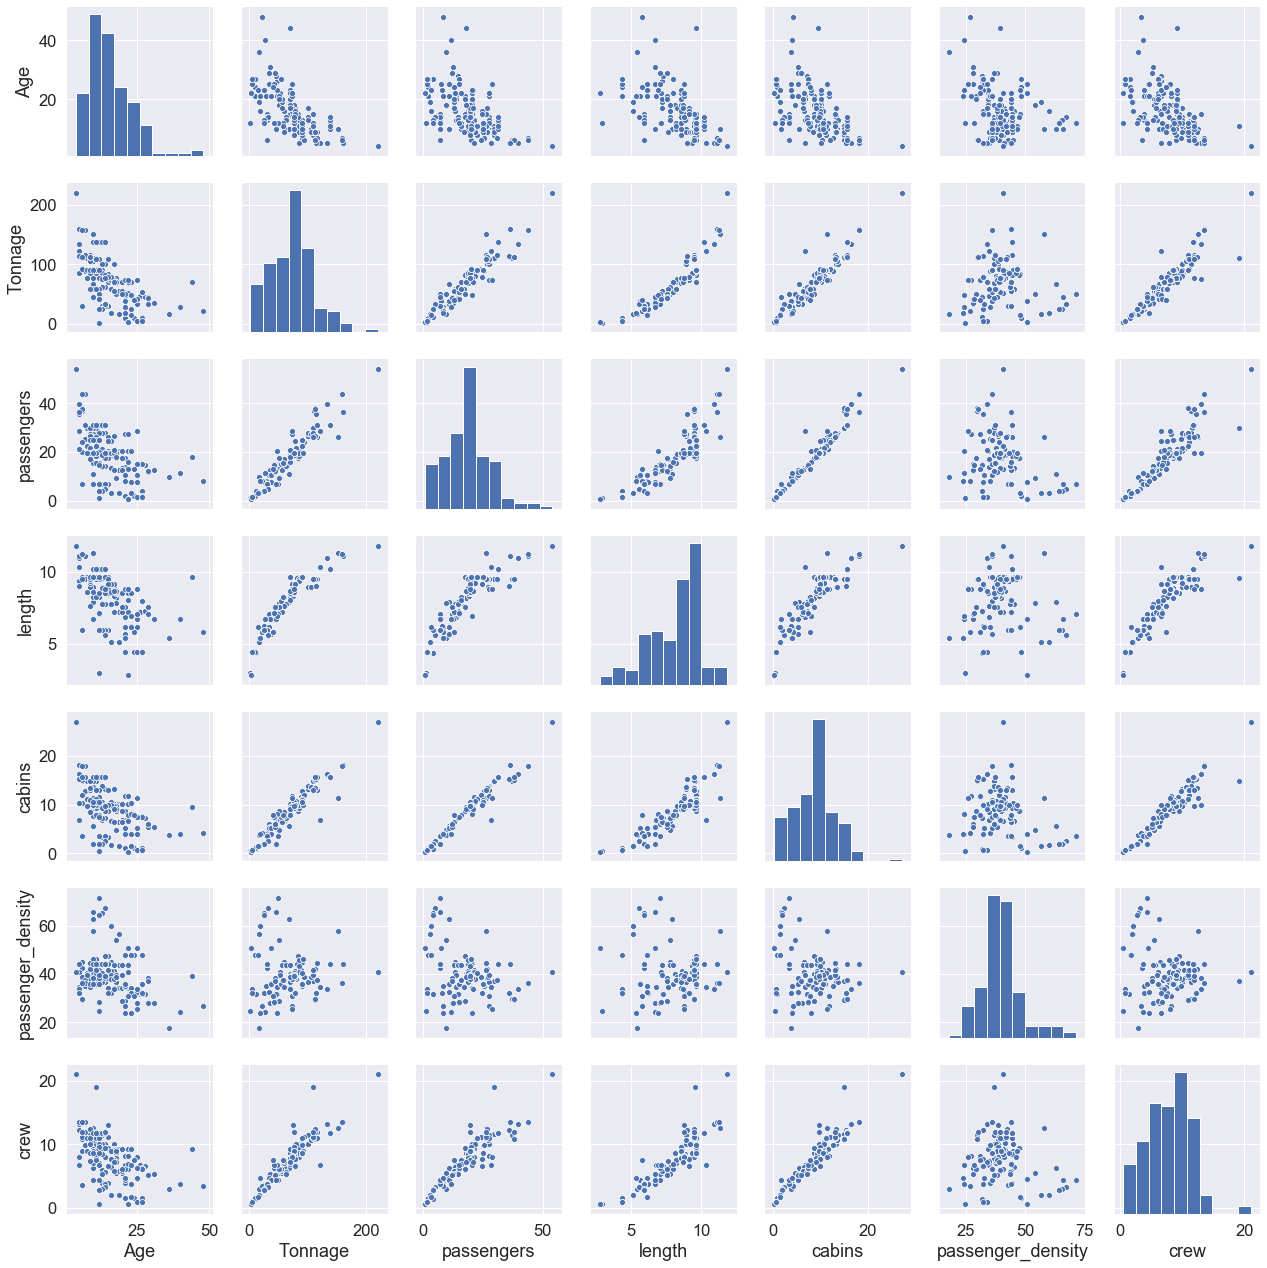

In [217]:
sns.pairplot(df)

In [221]:
# Trying to find out the co-variance among features, so that we can make an estimation of the important features
cols = ['Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(df[cols].iloc[:,range(0,7)].values)
cov_mat =np.cov(X_std.T)
cov_mat

array([[ 1.00636943, -0.61051007, -0.51882598, -0.53567624, -0.51326756,
        -0.28060619, -0.53403648],
       [-0.61051007,  1.00636943,  0.9510809 ,  0.92824328,  0.95480665,
        -0.04110641,  0.93347689],
       [-0.51882598,  0.9510809 ,  1.00636943,  0.8891624 ,  0.9825601 ,
        -0.29674522,  0.92106365],
       [-0.53567624,  0.92824328,  0.8891624 ,  1.00636943,  0.89546571,
        -0.09106483,  0.90156272],
       [-0.51326756,  0.95480665,  0.9825601 ,  0.89546571,  1.00636943,
        -0.25479336,  0.9568788 ],
       [-0.28060619, -0.04110641, -0.29674522, -0.09106483, -0.25479336,
         1.00636943, -0.15649979],
       [-0.53403648,  0.93347689,  0.92106365,  0.90156272,  0.9568788 ,
        -0.15649979,  1.00636943]])

In [222]:
#Plotting the co-variance matrix with a heat-map

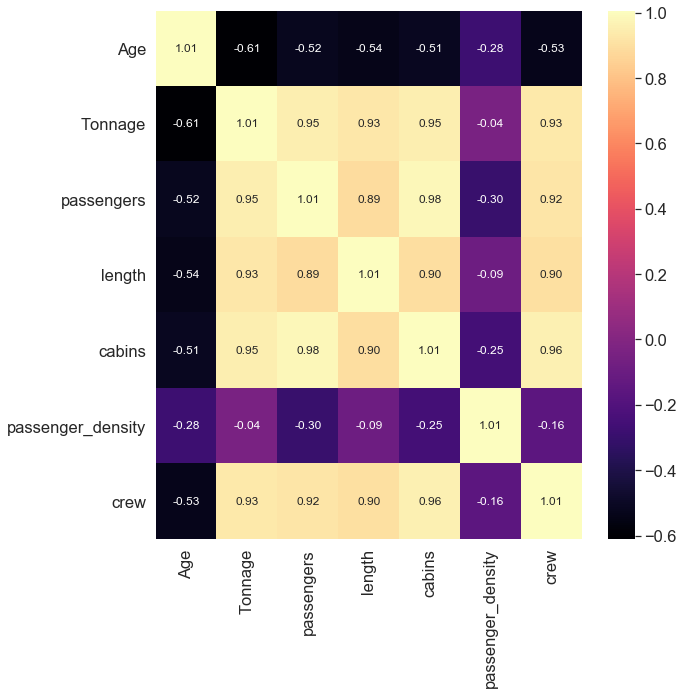

In [227]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 cmap= 'magma',
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.tight_layout()
plt.show()

In [115]:
# from above plot it is clear that "Crew" is directly proportional to - "cabins", "length", "passengers", "tonnage"
# no direct relationship with "age" and "passenger density"

In [228]:
df1 = df[["Tonnage", "passengers", "length", "cabins", "crew"]]

In [229]:
df1

,Tonnage,passengers,length,cabins,crew
0,30.277,6.94,5.94,3.55,3.55
1,30.277,6.94,5.94,3.55,3.55
2,47.262,14.86,7.22,7.43,6.70
3,110.000,29.74,9.53,14.88,19.10
4,101.353,26.42,8.92,13.21,10.00
...,...,...,...,...,...
153,3.341,0.66,2.79,0.33,0.59
154,76.800,19.60,8.79,9.67,12.00
155,5.350,1.58,4.40,0.74,0.88
156,5.350,1.67,4.40,0.74,0.88


In [230]:
df1.describe()

,Tonnage,passengers,length,cabins,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000
mean,71.284671,18.457405,8.130633,8.830000,7.794177
std,37.229540,9.677095,1.793474,4.471417,3.503487
min,2.329000,0.660000,2.790000,0.330000,0.590000
25%,46.013000,12.535000,7.100000,6.132500,5.480000
50%,71.899000,19.500000,8.555000,9.570000,8.150000
75%,90.772500,24.845000,9.510000,10.885000,9.990000
max,220.000000,54.000000,11.820000,27.000000,21.000000


In [231]:
df2 = df1
df2 = df2[["Tonnage", "passengers", "length", "cabins"]]
df2

,Tonnage,passengers,length,cabins
0,30.277,6.94,5.94,3.55
1,30.277,6.94,5.94,3.55
2,47.262,14.86,7.22,7.43
3,110.000,29.74,9.53,14.88
4,101.353,26.42,8.92,13.21
...,...,...,...,...
153,3.341,0.66,2.79,0.33
154,76.800,19.60,8.79,9.67
155,5.350,1.58,4.40,0.74
156,5.350,1.67,4.40,0.74


In [232]:
std = StandardScaler()
std_transform = std.fit_transform(df2)
df2 = pd.DataFrame(std_transform, columns=["Tonnage", "passengers", "length", "cabins"])
#df2["crew"] = df1["crew"]
df1["crew"]

0       3.55
1       3.55
2       6.70
3      19.10
4      10.00
       ...  
153     0.59
154    12.00
155     0.88
156     0.88
157     1.80
Name: crew, Length: 158, dtype: float64

In [233]:
df1

,Tonnage,passengers,length,cabins,crew
0,30.277,6.94,5.94,3.55,3.55
1,30.277,6.94,5.94,3.55,3.55
2,47.262,14.86,7.22,7.43,6.70
3,110.000,29.74,9.53,14.88,19.10
4,101.353,26.42,8.92,13.21,10.00
...,...,...,...,...,...
153,3.341,0.66,2.79,0.33,0.59
154,76.800,19.60,8.79,9.67,12.00
155,5.350,1.58,4.40,0.74,0.88
156,5.350,1.67,4.40,0.74,0.88


In [234]:
#making the train test split

In [235]:
df1

,Tonnage,passengers,length,cabins,crew
0,30.277,6.94,5.94,3.55,3.55
1,30.277,6.94,5.94,3.55,3.55
2,47.262,14.86,7.22,7.43,6.70
3,110.000,29.74,9.53,14.88,19.10
4,101.353,26.42,8.92,13.21,10.00
...,...,...,...,...,...
153,3.341,0.66,2.79,0.33,0.59
154,76.800,19.60,8.79,9.67,12.00
155,5.350,1.58,4.40,0.74,0.88
156,5.350,1.67,4.40,0.74,0.88


In [249]:
df2["crew"] = df1["crew"]
df2["Cruise_line"] = df["Cruise_line"]
df2

,Tonnage,passengers,length,cabins,crew,Cruise_line
0,-1.104984,-1.193956,-1.225331,-1.184588,3.55,Azamara
1,-1.104984,-1.193956,-1.225331,-1.184588,3.55,Azamara
2,-0.647310,-0.372926,-0.509363,-0.314095,6.70,Carnival
3,1.043215,1.169614,0.782736,1.357341,19.10,Carnival
4,0.810215,0.825445,0.441533,0.982670,10.00,Carnival
...,...,...,...,...,...,...
153,-1.830796,-1.844975,-2.987284,-1.907008,0.59,Star
154,0.148615,0.118448,0.368817,0.188457,12.00,Star
155,-1.776662,-1.749603,-2.086730,-1.815023,0.88,Windstar
156,-1.776662,-1.740273,-2.086730,-1.815023,0.88,Windstar


In [252]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories=[0 ,1])
df2 = pd.get_dummies(df2[['Cruise_line','Tonnage', 'passengers', 'length', 'cabins','crew']])
df2

,Tonnage,passengers,length,cabins,crew,Cruise_line_Azamara,Cruise_line_Carnival,Cruise_line_Celebrity,Cruise_line_Costa,Cruise_line_Crystal,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,-1.104984,-1.193956,-1.225331,-1.184588,3.55,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.104984,-1.193956,-1.225331,-1.184588,3.55,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.647310,-0.372926,-0.509363,-0.314095,6.70,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.043215,1.169614,0.782736,1.357341,19.10,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.810215,0.825445,0.441533,0.982670,10.00,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,-1.830796,-1.844975,-2.987284,-1.907008,0.59,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
154,0.148615,0.118448,0.368817,0.188457,12.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
155,-1.776662,-1.749603,-2.086730,-1.815023,0.88,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
156,-1.776662,-1.740273,-2.086730,-1.815023,0.88,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [265]:
from sklearn.model_selection import train_test_split
y = df2["crew"]
x = df2.drop(['crew'], axis=1)

In [266]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [267]:
lr = LinearRegression()

In [268]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [269]:
y_pred = lr.predict(x_test)

In [270]:
#calculating the equation coeficients
lr.coef_

array([ 0.77878603, -0.66287921,  1.12534352,  2.43389609, -0.05164265,
        0.42079151,  0.42184133, -0.38624898, -0.27721321, -0.31568318,
        0.29204336, -0.69408126, -0.17233443,  0.40215862,  0.4624726 ,
       -0.12044525, -0.22107158, -0.30248966,  0.30418746, -1.44634778,
        0.4298682 ,  0.07179878,  1.48875807, -0.30636194])

In [271]:
#calculating the intercept value of the equation
lr.intercept_   

7.93282333175204

In [272]:
#calculating the error metrics and r2 score

from sklearn import metrics
from sklearn.metrics import r2_score

In [273]:
print("MSE: {}".format(metrics.mean_squared_error(y_pred, y_test)))
print("MAE: {}".format(metrics.mean_absolute_error(y_pred, y_test)))
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_pred, y_test))))
print("R2 SCORE: {}".format(r2_score(y_pred, y_test)))

MSE: 0.5175591673336496
MAE: 0.48058359410864115
RMSE: 0.7194158514612043
R2 SCORE: 0.9459818113153964


Text(0, 0.5, 'Predicted Y')

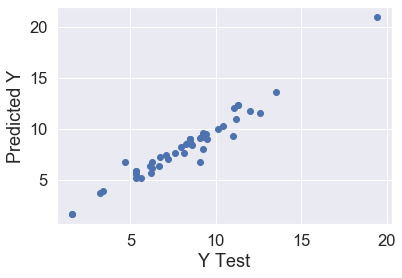

In [274]:
plt.scatter(y_pred, y_test)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [275]:
df

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00
...,...,...,...,...,...,...,...,...,...
153,Taurus,Star,22,3.341,0.66,2.79,0.33,50.62,0.59
154,Virgo,Star,14,76.800,19.60,8.79,9.67,39.18,12.00
155,Spirit,Windstar,25,5.350,1.58,4.40,0.74,33.86,0.88
156,Star,Windstar,27,5.350,1.67,4.40,0.74,32.04,0.88


In [277]:
# Tried 2 cases - one in which Cruise_line was not taken, 
# and the other one in which cruise line feature was also taken, after One Hot Encoder
# Earlier built the model just with the 4 numerical features, which had high co-variance with the target value
# In the later model, also included 'cruise line' as it also has an impact on the estimation(as told by the client)